### 2018.02.07 Biomedical-Lab ###

## Deep neural networks show an equivalent and often superior performance to dermatologists in onychomycosis diagnosis: Automatic construction of onychomycosis datasets by region-based convolution deep neural network ##

Seung Seog Han, Gyeong Hun Park, Woohyung Lim, Myoung Shin Kim, Jung Im Na, Ilwoo Park, Sung Eun Chang*

#### 이건 보통 확인을 잘 안하지만....
1. **Received: July 6, 2017**
2. Accepted: January 5, 2018
3. Published: January 19, 2018

### Objective - 논문의 목적 ###

* To investigate whether AI (CNN) can achieve a performance above that of a clinical specialists by resolving dataset deficiencies with the help of another AI (R-CNN) - R-CNN을 이용해 데이터 부족을 해결하여 CNN이 임상 전문가 보다 뛰어난 퍼포먼스를 보여줄 수 있는가?

### What is onychomycosis? - 조갑진균증 (손발톱무좀) 이란?###

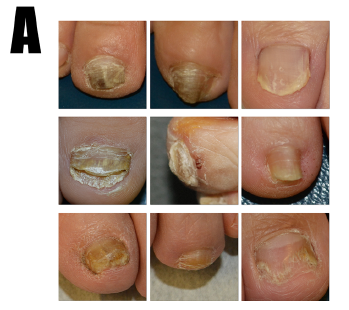

> Onychomycosis, also known as tinea unguium, is a fungal infection of the nail. (wikipedia)

### Then, why onychomycosis? - 그렇다면 왜 손발톱 무좀을 선택했을까?###

* Wide-spreading disease - 흔하고
* Fewere racial differences - 인종간 차이가 적고
* Many nail palates in the limbs! - 손발에 각각 10개나 있고!
* Easy to unify the composition of nail photographs to the square - 사각형에 핏 하여

## Material ##

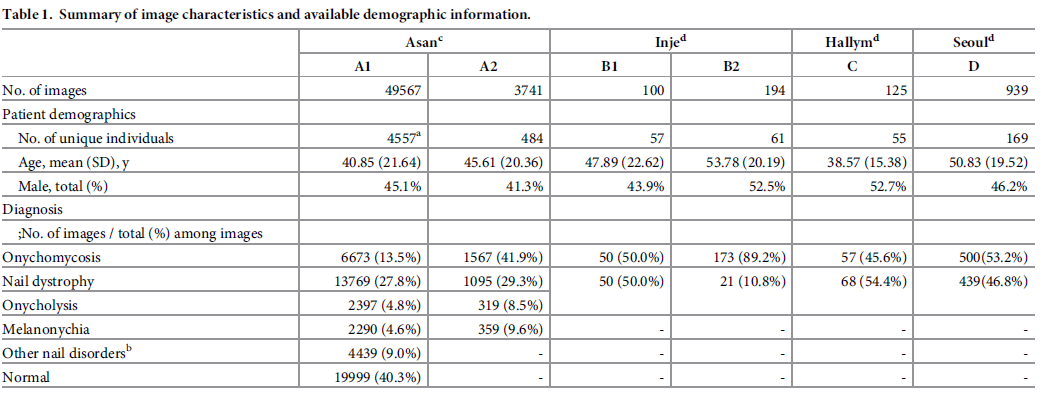

* Dataset A : 598,854 medical images from 2003 to 2016 (Asan Medical Center)
    * A1 : 49,567 images from 4,557 patients using R-CNN
    * A2 : 3,741 images from 484 patients by chart review
    

### Dataset A2 ###

chart review를 통해 선정한 3,741장의 이미지를 한 명의 전문가가 cropping 및 labeling을 하고 이를 R-CNN의 학습에 사용합니다.  

### Dataset A1 ###

R-CNN(faster R-CNN,https://github.com/rbgirshick/py-faster-rcnn, model = VGG-16)과 2개(hand and foot image selector and fine image selector, model = ResNet-152)의 CNN 모델을 이용해 dataset A로부터 dataset A1을 만들어 냅니다. 

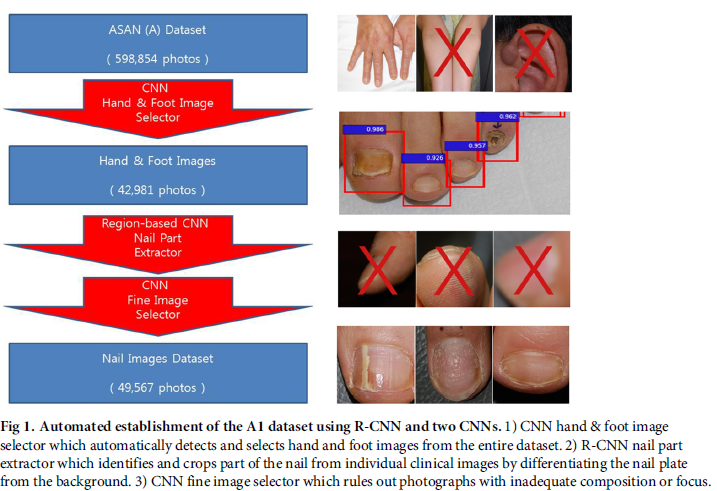

### Wrong images ###

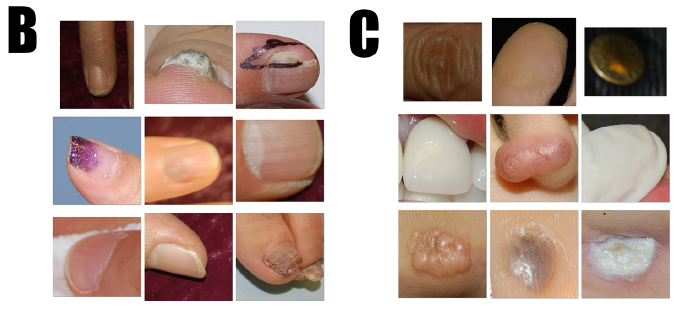

### Validation Dataset ###

* B,C, and D dataset (1,358 images)
    * B1, confirmed by fungal culture
    * D, by KOH test
* E Dataset
    * Web-based image search for "tinea", "onychomycosis", "nail dystrophy", "onycholysis", and "melanonychia" in English, Korean, and Japanese on http://google.com and http://bing.com, and downloaded a total of 15,844 images

## Framework and Resources ##

* Caffe 
* ResNet-152 (base_lr, 0.0001;max, 3 epochs; step, 2 epochs; gamma, 0.1; weight_decay, 0.00001; train_batch_size, 24) 
* VGG-19 (base_lr, 0.0001; max, 5 epochs; step, 5 epochs; gamma, 0.1; weight_decay, 0.0001; train_batch_size, 43)
* 0-, 180-, and 270-degree rotation on the original images
* Resized to 224x224 and a histogram normalization
* Ubuntu 16.04 with an NVIDIA GTX 1070 (CUDA 8.0 and cuDNN 5.1)

## Ensemble ##

* ResNet-152 -> fc 6 
* VGG-19 -> fc 6
* fc 12 -> two-layered feedforard neural networks -> 2 (무좀 혹은 무좀이 아닌)

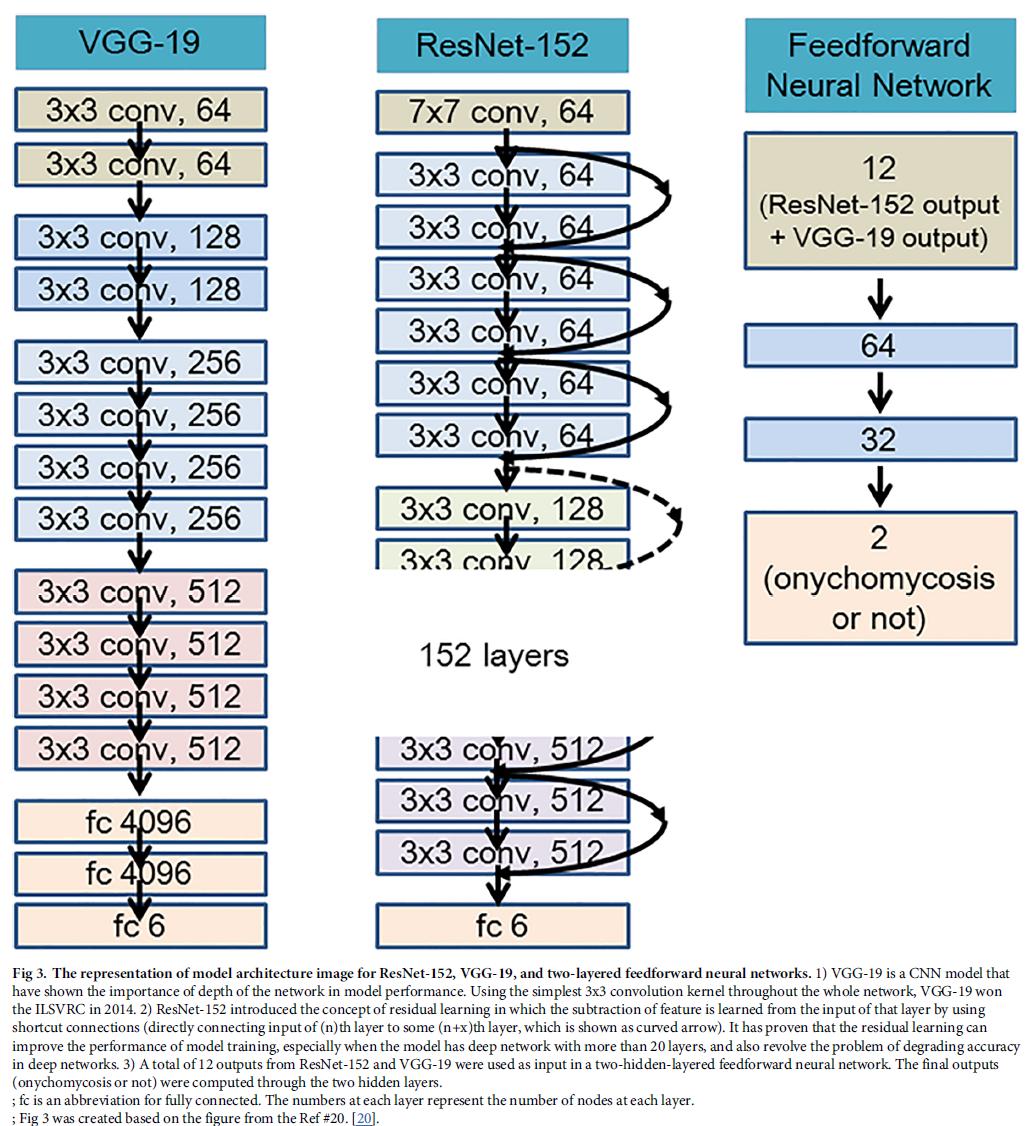

## Results ##

| Model | Trained Data | Validatin Data |Sensitivity | Specificity | AUC |
|:--------:|:--------:|:--------:|:--------:|:---------:|
| VGG-19 | A1 | B1 | 90.7 ± 3.1 | 91.3 ± 1.2 | 0.96 ± 0.02 |
| VGG-19 | A1 | B2 | 95.0 ± 2.0 | 95.0 ± 0.0 | 0.98 ± 0.02 |
| VGG-19 | A1 | C | 80.0 ± 2.0 | 86.0 ± 6.2 | 0.90 ± 0.06 |
| VGG-19 | A1 | D | 87.3 ± 2.1 | 68.0 ± 2.1 | 0.82 ± 0.01 |
| ResNet-152 | A1 | B1 | 94.7 ± 1.2 | 98.0 ± 0.0 | 0.98 ± 0.00 |
| ResNet-152 | A1 | B2 | 90.3 ± 3.1 | 95.0 ± 5.0 | 0.97 ± 0.01 |
| ResNet-152 | A1 | C | 86.7 ± 2.5 | 79.0 ± 3.6 | 0.90 ± 0.01 |
| ResNet-152 | A1 | D | 85.0 ± 2.0 | 69.3 ± 0.6 | 0.81 ± 0.00 |
| ResNet-152 | A2 | B1 | 88.0 ± 2.0 | 94.0 ± 4.0 | 0.94 ± 0.01 |
| ResNet-152 | A2 | B2 | 90.3 ± 6.7 | 96.7 ± 5.8 | 0.97 ± 0.01 |
| ResNet-152 | A2 | C | 84.7 ± 8.7 | 74.7 ± 6.7 | 0.85 ± 0.00 |
| ResNet-152 | A2 | D | 88.0 ± 3.6 | 56.0 ± 5.3 | 0.76 ± 0.01 |
| Enemble | A1 | B1 | 96.0 ± 0.0 | 94.7 ± 2.3 | 0.98 ± 0.00 |
| Enemble | A1 | B2 | 82.7 ± 4.2 | 96.7 ± 2.9 | 0.95 ± 0.00 |
| Enemble | A1 | C | 92.3 ± 2.9 | 79.3 ± 4.0 | 0.93 ± 0.01 |
| Enemble | A1 | D | 87.7 ± 4.0 | 69.3 ± 4.9 | 0.82 ± 0.00 |


***

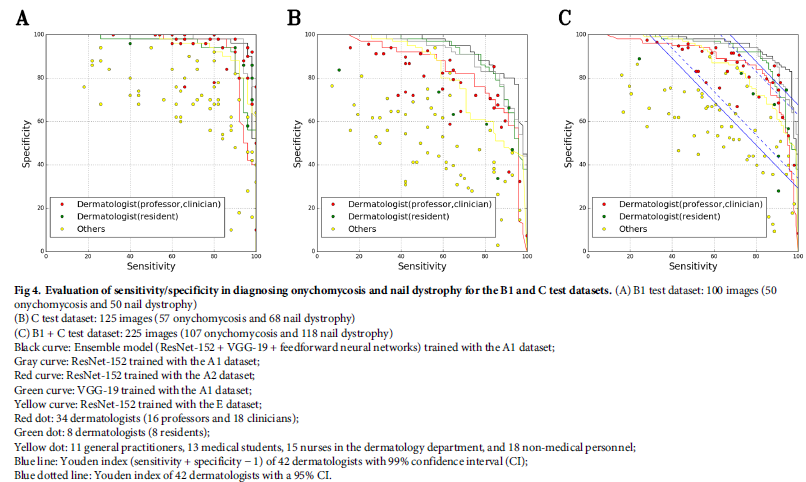

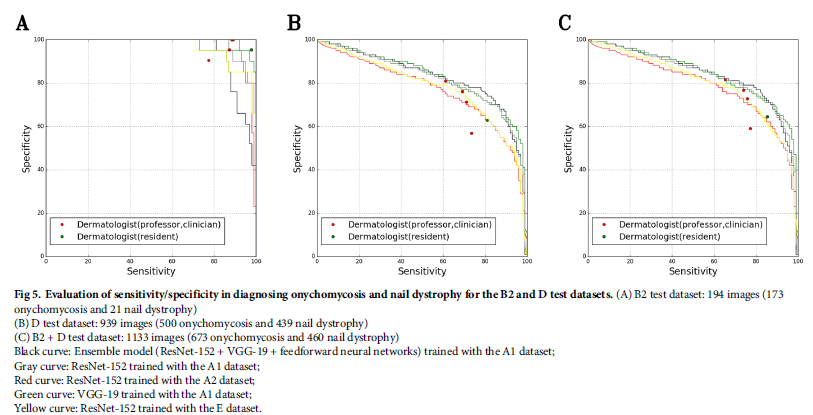

## Discussion ##

* Size of Dataset
* Standardization 
* Trainable image resolution
* skewed training dataset


## Validation Dataset and CNNs ##

### http://api.medicalphoto.org ###